# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [6]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
df = pd.read_csv("terrain.csv")

In [8]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [9]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

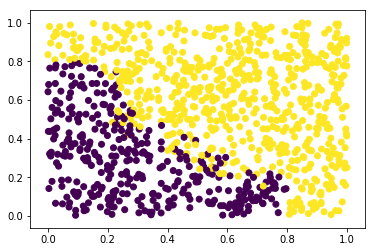

In [11]:
plt.scatter(df["bumpiness"],df["grade"],c=df["target"]);

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression()

In [14]:
clf.fit(X,y)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [16]:
clf.fit(X_train,y_train)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.91

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=5,scoring="accuracy").mean()

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: Futur

0.919998349958749

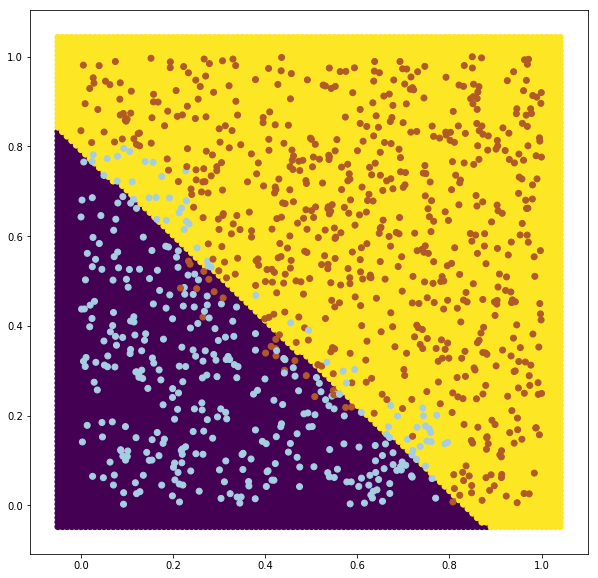

In [29]:
draw(clf,X,y,h=0.01)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)

In [32]:
cross_val_score(clf,X,y,scoring="accuracy").mean()

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9330014669456269

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [38]:
reg = GridSearchCV(KNeighborsClassifier(),
                  param_grid={"n_neighbors":np.arange(4,100)},
                  cv=5,
                  scoring="accuracy")

In [39]:
reg.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 4,  5, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
reg.best_score_

0.957

In [41]:
reg.best_params_

{'n_neighbors': 16}

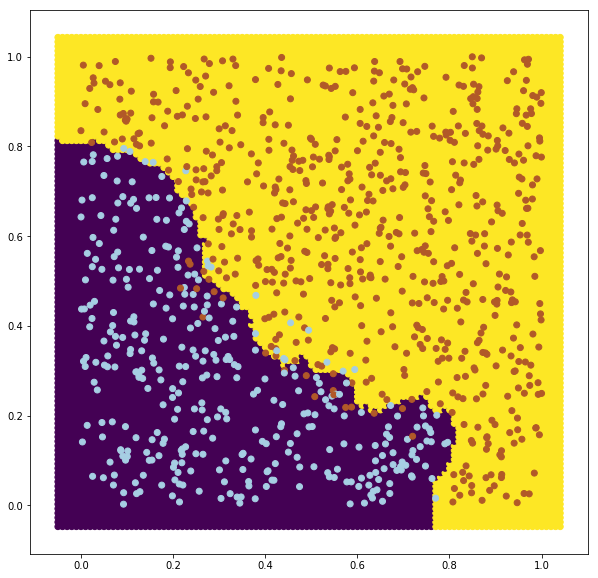

In [45]:
draw(reg.best_estimator_,X,y,0.01)

In [49]:
clfk = reg.best_estimator_

In [47]:
from sklearn.metrics import confusion_matrix

In [50]:
import seaborn as sns

In [52]:
confusion_matrix(y_test,clfk.predict(X_test))

array([[41,  0],
       [ 3, 56]])

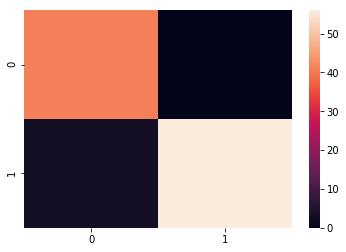

In [51]:
sns.heatmap(confusion_matrix(y_test,clfk.predict(X_test)))

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,clfk.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        41
         1.0       1.00      0.95      0.97        59

   micro avg       0.97      0.97      0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [55]:
from sklearn.svm import SVC

In [56]:
clf = SVC(kernel="linear",C=10)

In [59]:
cross_val_score(clf,X,y,cv=3).mean()

0.923009402880985

In [66]:
clf = GridSearchCV(SVC(kernel="poly",),
                  param_grid={"C":[1,10,100,1000,10000], "degree":[2,3,4,5]},
                  cv=3,
                  scoring="accuracy")

In [67]:
clf.fit(X,y)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/an

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/an

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sebastien.perez/an

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000, 10000], 'degree': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
clf.best_score_

0.945

In [69]:
clf.best_params_

{'C': 10000, 'degree': 4}

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
clft = DecisionTreeClassifier(max_depth=10)

In [79]:
clft.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

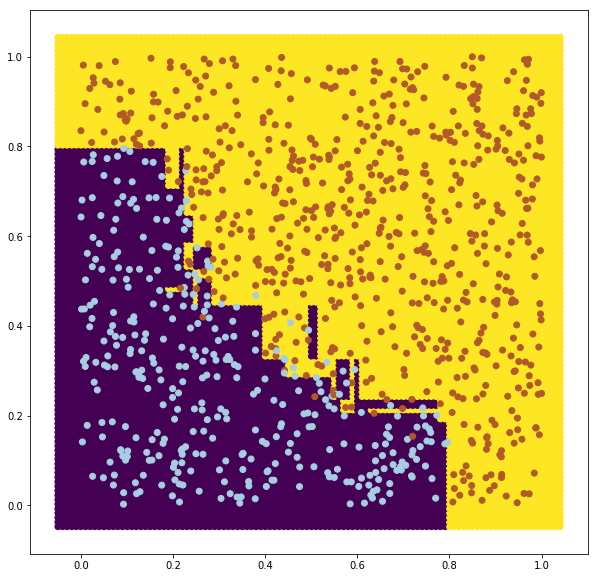

In [80]:
draw(clft,X,y,0.01)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
clf = GridSearchCV(DecisionTreeClassifier(),
                  param_grid={"max_depth":np.arange(2,20), 
                              "min_samples_leaf":np.arange(20,100,20)},
                  cv=3,
                  scoring="accuracy")

In [90]:
clf.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), 'min_samples_leaf': array([20, 40, 60, 80])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [91]:
clf.best_score_

0.936

In [92]:
clf.best_params_

{'max_depth': 4, 'min_samples_leaf': 20}

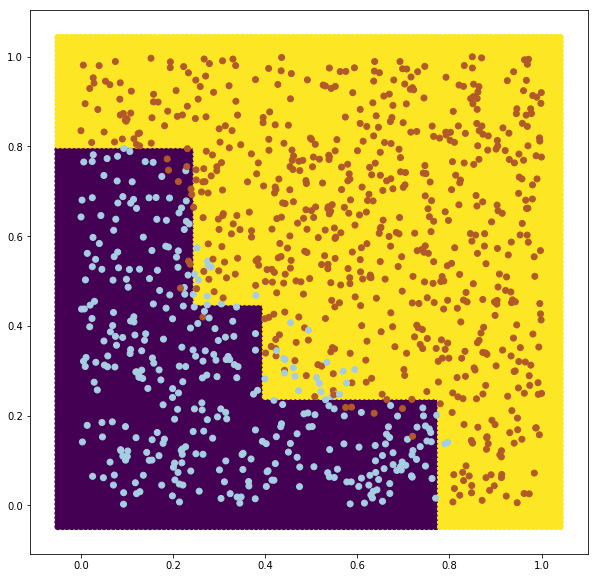

In [93]:
draw(clf.best_estimator_,X,y,0.01)

In [94]:
pred=clf.best_estimator_.predict_proba(X_test)

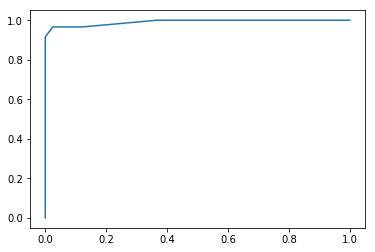

In [96]:
# Load the library
from sklearn.metrics import roc_curve,auc
# We chose the target
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,pred[:,target_pos])
plt.plot(fp,tp)

In [98]:
auc(fp,tp)

0.9911120297643655